# Jupyter Three.js Debug Test

Testing the 2D scatter plot positioning issue in Jupyter environment.

In [1]:
import numpy as np
import sys
sys.path.insert(0, '/Users/jmanning/hypertools')
import hypertools as hyp

# Enable widget extension if needed
print("Setting up environment...")

Setting up environment...


In [2]:
# Create test data with clear Y separation
test_data = np.array([
    [0, 3],    # Top point
    [1, 1],    # Upper middle
    [2, 0],    # Center
    [3, -1],   # Lower middle
    [4, -3]    # Bottom point
])

print("Test data (X, Y):")
for i, (x, y) in enumerate(test_data):
    print(f"  Point {i+1}: ({x}, {y})")

print(f"\nY range: {test_data[:, 1].min()} to {test_data[:, 1].max()}")

Test data (X, Y):
  Point 1: (0, 3)
  Point 2: (1, 1)
  Point 3: (2, 0)
  Point 4: (3, -1)
  Point 5: (4, -3)

Y range: -3 to 3


In [ ]:
# Create the plot
print("Creating plot...")
fig = hyp.plot(test_data, 'ro', markersize=15)

# Check what type of object we got back
print(f"Figure type: {type(fig)}")
print(f"Figure object: {fig}")

# If it's a HyperToolsFigure, we can debug it
if hasattr(fig, 'dimensionality'):
    # Debug info for HyperToolsFigure
    print(f"Dimensionality: {fig.dimensionality}")
    print(f"Camera position: {fig.camera.position}")
    print(f"Controls target: {fig.controls[0].target}")
    
    # Check the actual data positions
    positions = fig._data_to_positions(fig.datasets[0])
    positions_3d = positions.reshape(-1, 3)
    print("\nActual Three.js positions:")
    for i, (x, y, z) in enumerate(positions_3d):
        print(f"  Point {i+1}: ({x:.1f}, {y:.1f}, {z:.1f})")
else:
    print("Got Renderer object instead of HyperToolsFigure - need to restart kernel to pick up fixes")

In [ ]:
# Display the plot (if we have the right object type)
if hasattr(fig, 'show'):
    print("Displaying plot - check if points appear on y=0 line or at correct Y positions")
    fig.show()
else:
    print("Cannot display - fig is a Renderer object, not HyperToolsFigure")
    print("Restart kernel and re-run cells to pick up the plot.py fix")
    # Try to display the renderer directly
    fig

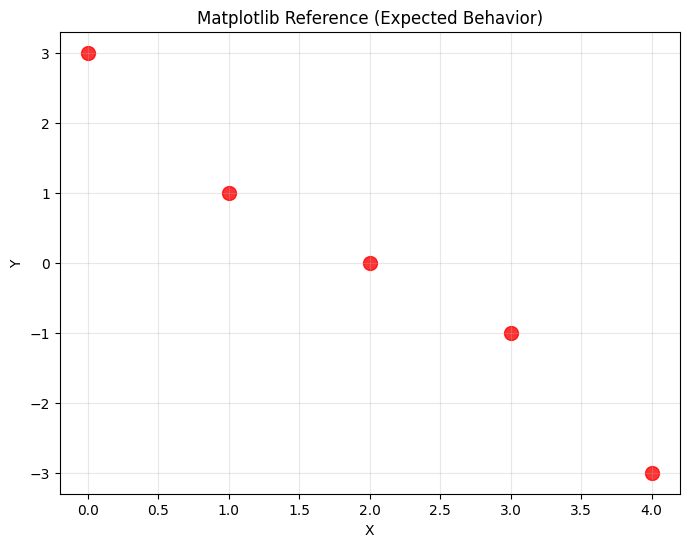


If Three.js plot shows all points on y=0 line, but matplotlib shows them spread out,
then we have a pythreejs widget rendering issue.


In [5]:
# For comparison, show matplotlib version
import matplotlib.pyplot as plt

# Create matplotlib comparison
plt.figure(figsize=(8, 6))
plt.scatter(test_data[:, 0], test_data[:, 1], c='red', s=100, alpha=0.8)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Matplotlib Reference (Expected Behavior)')
plt.grid(True, alpha=0.3)
plt.show()

print("\nIf Three.js plot shows all points on y=0 line, but matplotlib shows them spread out,")
print("then we have a pythreejs widget rendering issue.")